In [1]:
# Loading libraries
import pandas as pd
import numpy as np

In [2]:
# reading batting.csv
batting = pd.read_csv('Batting.csv')

## Dimension and info about data

In [3]:
# count of rows and columns in data set
batting.shape

(102816, 25)

In [4]:
# index info for data set
batting.index

RangeIndex(start=0, stop=102816, step=1)

In [5]:
# Displaying column names for data set
batting.columns

Index(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'stint',
       'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [6]:
# information about dat set
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [7]:
# count of non-NA value by each column
batting.count()

playerID     102816
nameFirst    102816
nameLast     102816
birthYear    102816
yearID       102816
stint        102816
teamID       102816
lgID         102079
G            102816
AB           102816
R            102816
H            102816
2B           102816
3B           102816
HR           102816
RBI          102392
SB           101516
CS            79360
BB           102816
SO            94978
IBB           66251
HBP          100006
SH            96478
SF            66782
GIDP          76706
dtype: int64

#### 3) How many players have hit 40 or more HRs in one single season? (Number only)

In [8]:
HRPlayerYear = batting.groupby(['yearID','playerID'])['HR'].sum().reset_index()
HRPlayerYear[HRPlayerYear['HR'] >= 40]['playerID'].nunique()

142

#### 4)How many players have hit more than 600 HRs for their career? 

In [9]:
HRPlayer = batting.groupby('playerID')['HR'].sum().reset_index()
HRPlayer[HRPlayer['HR'] > 600]['playerID'].nunique()

8

#### 5)	How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? 

In [11]:
HRPlayerYear = batting.groupby(['yearID','playerID']).agg({"HR":"sum","2B":"sum","3B":"sum","H":"sum"}).reset_index()
shortlist = HRPlayerYear[(HRPlayerYear['2B']>=40) & (HRPlayerYear['3B']>=10) & (HRPlayerYear['H']>=200) & (HRPlayerYear['HR']>=30) ]
shortlist['playerID'].nunique()

11

#### 6)	How many players have had 100 or more SBs in a season? 

In [10]:
HRPlayerYear = batting.groupby(['yearID','playerID'])['SB'].sum().reset_index()
HRPlayerYear[HRPlayerYear['SB'] >= 100]

,yearID,playerID,SB
3138,1887,brownpe01,103.0
3165,1887,comisch01,117.0
3209,1887,fogarji01,102.0
3275,1887,lathaar01,129.0
3322,1887,nicolhu01,138.0
3414,1887,wardjo01,111.0
3609,1888,lathaar01,109.0
3645,1888,nicolhu01,103.0
3903,1889,hamilbi01,111.0
4276,1890,hamilbi01,102.0


#### 7)	How many players in the 1960s have hit more than 200 HRs? 

In [12]:
HRPlayer = batting[(batting.yearID >= 1960) & (batting.yearID <= 1969)].groupby('playerID')['HR'].sum().reset_index()
HRPlayer[HRPlayer['HR'] > 200]

,playerID,HR
0,aaronha01,375
19,allisbo01,225
70,bankser01,269
279,cashno01,278
283,cepedor01,254
323,colavro01,245
751,howarfr01,288
830,kalinal01,210
856,killeha01,393
1009,mantlmi01,256


#### 8)	Who has hit the most HRs in history? (Dataframe)

In [13]:
HRPlayer = batting.groupby('playerID')['HR'].sum().reset_index()
HRPlayer.sort_values(by=['HR'],ascending = False).head(1)

,playerID,HR
1542,bondsba01,762


#### 9)	Who had the most hits in the 1970s? (Dataframe)

In [14]:
HRPlayer = batting[(batting.yearID >= 1970) & (batting.yearID <= 1979)].groupby('playerID')['H'].sum().reset_index()
HRPlayer.sort_values(by=['H'],ascending = False).head(1)

,playerID,H
1639,rosepe01,2045


#### 10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [15]:
batting['OBP'] = (batting['H'] + batting['BB'] + batting['IBB'] + batting['SH'] + batting['SF'])/batting['AB']
batting['PA'] = batting['AB'] + batting['BB'] + batting['IBB'] + batting['SH'] + batting['SF']
OBPPlayer = batting[batting['yearID'] == 1977].groupby('playerID').agg({'OBP':'mean','PA':'sum'}).reset_index()
OBPPlayer[OBPPlayer['PA'] >= 500].sort_values(by='OBP',ascending=False).head(5)

,playerID,OBP,PA
745,singlke01,0.563433,662.0
752,smithre06,0.559426,611.0
800,tenacge01,0.556064,578.0
334,hargrmi01,0.540952,649.0
135,carewro01,0.534091,706.0


#### 11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [16]:
batting['avg'] = batting['H']/batting['AB']
PlayerAvg = batting[batting['yearID'] == 2013].groupby('playerID').agg({'avg':'mean','PA':'sum'}).reset_index()
PlayerAvg[PlayerAvg['PA'] >= 300].sort_values(by='avg',ascending=False).head(8)

,playerID,avg,PA
167,cabremi01,0.347748,666.0
980,ramirha01,0.345395,336.0
269,cuddymi01,0.331288,543.0
759,mauerjo01,0.323596,515.0
1196,troutmi01,0.322581,717.0
595,johnsch05,0.321012,550.0
398,freemfr01,0.319419,632.0
962,puigya01,0.319372,427.0


#### 12)	Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [17]:
PlayerHits = batting[(batting.yearID >= 1940) & (batting.yearID <= 1949)].groupby('playerID')['H'].sum().reset_index()
PlayerHits.sort_values(by=['H'],axis=0,ascending = False).head(10)

,playerID,H
138,boudrlo01,1578
427,elliobo01,1563
1576,walkedi02,1512
1103,musiast01,1432
390,doerrbo01,1407
712,holmeto01,1402
33,applilu01,1376
1127,nichobi01,1328
961,marioma01,1310
239,cavarph01,1304


#### 13)	Who led MLB (entire data set) with the most hits the most times?  And how many times?  (Dataframe, Number) players and number of times

In [18]:
PlayerHits = batting.groupby(['yearID','playerID'])['H'].sum().reset_index()
MostHitsYear = PlayerHits.groupby('yearID').max().reset_index()['playerID'].value_counts()
pd.DataFrame(MostHitsYear.head(1))

,playerID
zimmech01,18


#### 14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [19]:
batting.groupby('playerID')['G'].sum().reset_index().sort_values(by = 'G',ascending = False).head(5)

,playerID,G
14719,rosepe01,3562
18728,yastrca01,3308
1,aaronha01,3298
7383,henderi01,3081
3155,cobbty01,3035


#### 15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [20]:
PlayerHR = batting.groupby('playerID').agg({'H':'sum','HR':sum}).reset_index()
PlayerHR[(PlayerHR['H'] > 3000) & (PlayerHR['HR'] >= 500)]['playerID'].nunique()

5

#### 16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [21]:
batting[batting['yearID'] == 1988]['HR'].sum()

3180

#### 17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [23]:
WadeBoggasStat = batting[(batting['nameFirst'] == 'Wade') & (batting['nameLast'] == 'Boggs')].groupby('yearID').agg({'AB':'sum','avg':'mean'}).reset_index()
WadeBoggasStat[WadeBoggasStat['AB'] >= 500].sort_values(by='avg', ascending=False).head(3)

,yearID,AB,avg
3,1985,653,0.367534
6,1988,584,0.366438
5,1987,551,0.362976


#### 18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [25]:
PlayerOBP = batting[batting['yearID'] == 1995].groupby('playerID').agg({'OBP':'mean','PA':'sum'}).reset_index()
PlayerOBP[PlayerOBP['PA'] >= 400].sort_values(by='OBP',ascending=False)

,playerID,OBP,PA
1002,thomafr04,0.667343,670.0
628,martied01,0.628180,650.0
659,mcgwima01,0.586751,416.0
107,bondsba01,0.583004,652.0
235,davisch01,0.577830,534.0
612,magadda01,0.551724,431.0
1005,thomeji01,0.542035,555.0
46,baineha01,0.524675,472.0
1080,weisswa01,0.524590,540.0
104,boggswa01,0.510870,546.0


#### 19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [26]:
Max3B = batting[batting['yearID'].isin([1922,1925,1926,1928])].groupby('playerID')['3B'].sum().reset_index().max()
pd.DataFrame(Max3B).transpose()

,playerID,3B
0,zitzmbi01,59


#### 20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [27]:
HRPlayerYear = batting.groupby(['yearID','playerID']).agg({'HR':'sum','SB':'sum'}).reset_index()
HRPlayerYear[(HRPlayerYear['HR'] >= 30) & (HRPlayerYear['SB'] >= 30)]['playerID'].nunique()

38

#### 21) Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [28]:
PlayerOBP = batting[batting['yearID'] == 1986].groupby('playerID').agg({'OBP':'mean','PA':'sum'}).reset_index()
PlayerOBP[PlayerOBP['PA'] >= 400].sort_values(by='OBP',ascending = False).head(1)

,playerID,OBP,PA
78,boggswa01,0.575862,707.0


#### 22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [29]:
NLPlayerOBP = batting[(batting['yearID'] == 1997) & (batting['lgID'] == 'NL')].groupby('playerID').agg({'OBP':'mean','PA':'sum'}).reset_index()
NLPlayerOBP[NLPlayerOBP['PA'] >= 400].sort_values(by='OBP',ascending = False).head(1)

,playerID,OBP,PA
60,bondsba01,0.637218,716.0


#### 23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [30]:
league_avg = batting[batting['yearID'] == 2012]['HR'].mean()
PlayerHR = batting[batting['yearID'] == 2012].groupby('playerID').agg({'HR':'sum','PA':'sum'}).reset_index()
PlayerHR[(PlayerHR['PA'] >= 500) & (PlayerHR['HR'] > league_avg)]

,playerID,HR,PA
6,ackledu01,12,675.0
17,alonsyo01,9,625.0
18,altuvjo01,7,624.0
20,alvarpe01,30,591.0
29,aokino01,10,576.0
41,avilemi01,13,544.0
45,aybarer01,8,549.0
57,barneda01,7,586.0
73,beckhgo01,16,575.0
82,beltrad01,36,657.0


#### 24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [31]:
batting['age'] = batting['yearID'] - batting['birthYear']
df = batting.groupby(['yearID','playerID','age'])['HR'].sum().reset_index() 
df[df['HR'] >= 50].sort_values(by='age').head(1)

,yearID,playerID,age,HR
82621,2007,fieldpr01,23,50


#### 25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [32]:
batting_sort = batting.sort_values(by=['playerID','yearID'])
batting_sort['cumHR'] = batting_sort.groupby('playerID')['HR'].cumsum()
YoungTo300 = batting_sort[batting_sort['cumHR'] >= 300].groupby('playerID')['age'].min().sort_values().head(5)
pd.DataFrame(YoungTo300)

,age
playerID,
foxxji01,28
ottme01,28
pujolal01,28
jonesan01,28
rodrial01,28


## Visualisation
#### Graph total HRs per season using bar graph

Text(0,0.5,'Home Runs')

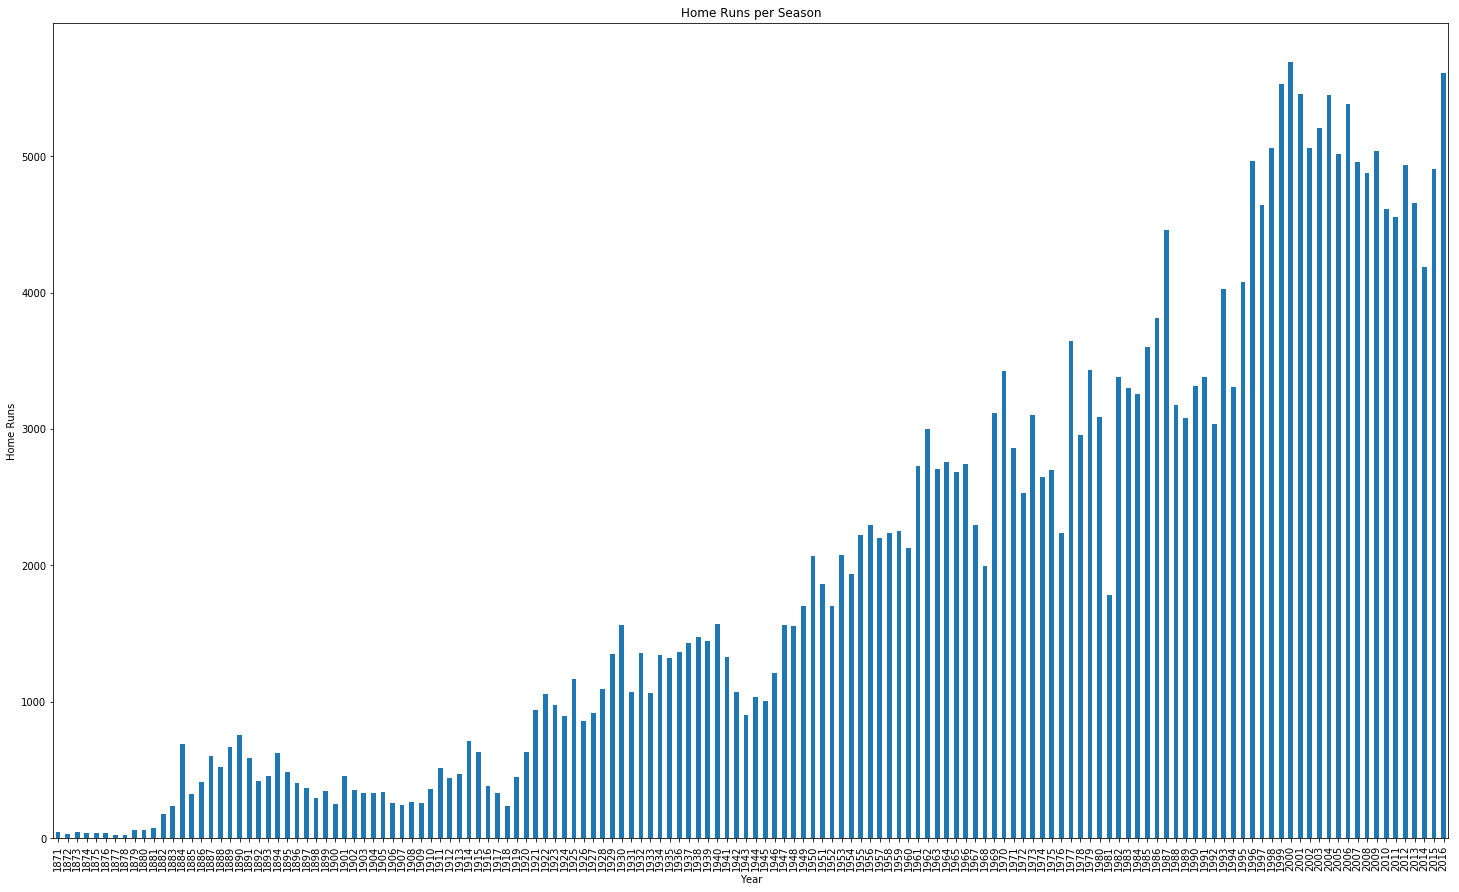

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = batting.groupby('yearID')['HR'].sum().plot(kind='bar',figsize=(25,15),title='Home Runs per Season')
ax.set_xlabel('Year')
ax.set_ylabel('Home Runs')

#### Using a line graph please graph the average HRs per AB per season

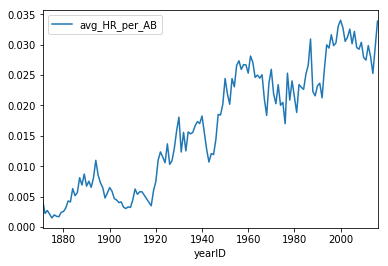

In [34]:
df = batting.groupby('yearID').agg({'HR':'sum','AB':'sum'}).reset_index()
df['avg_HR_per_AB'] = df['HR']/df['AB']
df[['avg_HR_per_AB','yearID']].plot.line(x='yearID',y='avg_HR_per_AB')